In [43]:
# Handle imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [44]:
# import data
data = pd.read_csv("data/data.csv",',',error_bad_lines=False)

In [45]:
allurlsdata = pd.DataFrame(data) 

In [46]:
allurlsdata.head()

,url,label
0,https://www.standardmedia.co.ke/,good
1,https://www.must.ac.ke,good
2,https://www.nation.co.ke/,good
3,diaryofagameaddict.com,bad
4,espdesign.com.au,bad


In [47]:
good = data[data.label=="good"]
bad = data[data.label=="bad"]

In [48]:
good[:10]

,url,label
0,https://www.standardmedia.co.ke/,good
1,https://www.must.ac.ke,good
2,https://www.nation.co.ke/,good
6,https://www.the-star.co.ke/,good
42772,01453.com/,good
42773,015fb31.netsolhost.com/bosstweed.html,good
42774,02bee66.netsolhost.com/lincolnhomepage/,good
42775,02ec0a3.netsolhost.com/getperson.php?personID=...,good
42776,032255.com/,good
42777,05minute.com/,good


In [49]:
good_select =good[:75643]

In [50]:
data.label.unique()

array(['good', 'bad'], dtype=object)

In [51]:
data.label.value_counts()

good    344825
bad      75644
Name: label, dtype: int64

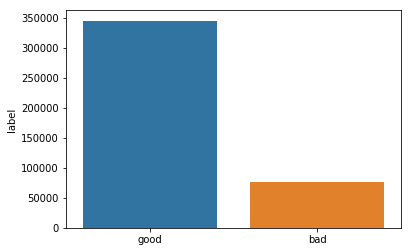

In [52]:
sns.barplot(x=data.label.value_counts().index,y=data.label.value_counts())

In [53]:
# data transformation
def getTokens(input):
    tokensBySlash = str(input.encode("utf8")).split("/")
    allTokens = []
    for i in tokensBySlash:
        tokens = str(i).split("-")
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split(".")
            tokensByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove("com")
    return allTokens

In [54]:
# Extract labels and features
alldata = good_select.append(bad)
alldata = np.array(data)
features = [d[0] for d in alldata]
labels = [d[1] for d in alldata]

In [55]:
# initialize vectorizer
vectorizer = TfidfVectorizer(tokenizer=getTokens)

In [56]:
# vector transform url
x = vectorizer.fit_transform(features)

In [57]:
# dumb vectorizer to file
pickle.dump(vectorizer,open("vectorizer.pkl","wb"))

In [58]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [59]:
pickle.dump(label_encoder,open("label_encoder.pkl","wb"))

In [18]:
# train split the dataset
x_tr, x_tes, y_tr,y_tes= train_test_split(x,labels,test_size=0.20,random_state=42)

In [60]:
# Functions to train the model
def logistic(x_tr,x_tes,y_tr,y_tes):
    model_1 = LogisticRegression()
    model_1.fit(x_tr,y_tr)
    
    y_pred = model_1.predict(x_tes)
    print("Logistic Regression")
    print(classification_report(y_tes,y_pred))
    # dumb the models
    pickle.dump(model_1,open("logistic_regression.pkl","wb"))
    
    return model_1

def naive(x_tr,x_tes,y_tr,y_tes):
    model_2 = MultinomialNB()
    model_2.fit(x_tr,y_tr)
    
    y_pred = model_2.predict(x_tes)
    print("Naive Bayes Classifier")
    print(classification_report(y_tes,y_pred))
    pickle.dump(model_2,open("naive_bayes.pkl","wb"))
    return model_2

In [61]:
x.shape

(420469, 721223)

In [62]:
# fit models
model1 = logistic(x,x,labels,labels)
modle2 = naive(x,x,labels,labels)

Logistic Regression
              precision    recall  f1-score   support

         bad       0.99      0.87      0.92     75644
        good       0.97      1.00      0.98    344825

   micro avg       0.97      0.97      0.97    420469
   macro avg       0.98      0.93      0.95    420469
weighted avg       0.98      0.97      0.97    420469

Naive Bayes Classifier
              precision    recall  f1-score   support

         bad       1.00      0.94      0.97     75644
        good       0.99      1.00      0.99    344825

   micro avg       0.99      0.99      0.99    420469
   macro avg       0.99      0.97      0.98    420469
weighted avg       0.99      0.99      0.99    420469



In [22]:
preddictions = pd.DataFrame(data=prediction, columns=['bad'])

In [23]:
np.array(preddictions.loc[1])

array([0.04658973])

In [40]:
vect = vectorizer.transform(["01453.com/"])

In [41]:
prediction = model1.predict(vect)

In [42]:
prediction

array(['good'], dtype='<U4')

In [27]:
prediction[:3]

array(['bad'], dtype='<U4')

In [39]:
alldata.shape

(420464, 2)